<h1>Dropbox Case: Predict pay customer </h1>

<br>
<br>
<li>Goal:</li>

The person that given the 56 factors, the variables, through the model to determine if the person will pay for the service. Then, to verify the accuracy of this prediction model with Accuracy, Sensitivity, Specificity rate. 
<br>
<br>
<li>Step</li>
Step 1: Choose Variable
<br>
Step 2: Split Data into training / testing set
<br>
Step 3: Choose some Algorithms to check Accuracy rate of each algorithm (Accuracy, Sensitivity, Specificity rate.)
<br>
Step 4: Give result plot of above rate
<br>

In [20]:
import pandas as pd
# Get Data
file_path = '/Users/tingtingyang/Downloads/5_freemium_DATA.csv'
df = pd.read_csv(file_path)
print(df.head())

   FoP  soft_type       EXP       PE1       PE2       PE3       PE4       EE1  \
0    0   1.148838 -0.765222 -0.209008 -0.222414  1.171786 -0.403713 -0.354986   
1    0   1.148838  0.870014 -0.209008 -0.222414 -0.163135 -0.403713 -0.354986   
2    0   1.148838  0.870014 -0.209008 -0.222414 -0.163135 -0.403713 -0.354986   
3    0   1.148838  0.052396 -0.209008  1.122091  1.171786 -0.403713  1.152581   
4    1  -0.869147  0.870014  1.043176  1.122091  1.171786  0.978387  1.152581   

        EE2       EE3  ...       IU2       IU3       AU1       IP1       IP2  \
0 -0.311045  0.560576  ... -0.152039 -0.142976  1.251908 -0.362700  0.788787   
1 -0.311045 -0.337148  ... -0.152039 -0.142976  1.251908  0.672925  0.788787   
2 -0.311045 -0.337148  ... -0.152039 -0.142976  0.096433 -0.362700 -0.191354   
3  1.148475 -0.337148  ... -0.152039 -0.142976  0.096433 -0.362700 -1.171495   
4  1.148475 -1.234873  ... -0.152039 -0.142976 -1.059042  0.672925  0.788787   

        IP3       GEN      AGE  

<h1>Determine Variable</h1>

feature selection use LDA

In [21]:
#determine variable using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

# Exclude 1st col and assign 1st col as target variable (actual value)
df_without_first_col = df.iloc[:, 1:]
target = df.iloc[:, 0]

# Feature selection of LDA
lda = LinearDiscriminantAnalysis()
lda.fit(df_without_first_col, target) # Fit LDA on the data and target variable
feature_importance = lda.coef_[0] # Get the stats score as importance of each feature

# Create df to show feature importance and sort by importance
feature_importance_df = pd.DataFrame({'Feature': df_without_first_col.columns, 'Importance': abs(feature_importance)})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Display the top features
print(feature_importance_df.head())


   Feature  Importance
51     IP3    1.127835
24     TE4    1.101246
48     AU1    0.834354
26    PTE2    0.775222
49     IP1    0.731726


<h1>Split Data and Use Model to Predict</h1>
<br>
split data into training set and test set (80%: 20%)

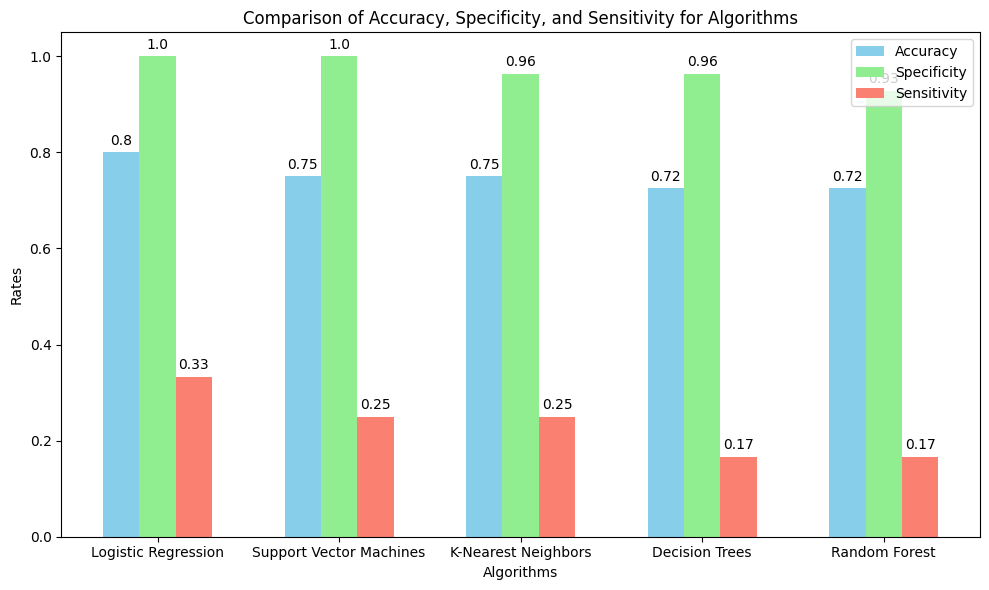

In [26]:
#stats calc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
#model import
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#split data
from sklearn.model_selection import train_test_split 
#for plot
import matplotlib.pyplot as plt 
import seaborn as sns 

# Use selected top 5 variables from last step
top_5_variables = ['IP3', 'TE4', 'AU1', 'PTE2', 'IP1']  

# Separating features and target variable(1st col)
X = df[top_5_variables]
y = df.iloc[:, 0] #eliminate 

# Splitting data: train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'Support Vector Machines': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Training and evaluating each classifier
results = {'Accuracy': {}, 'Specificity': {}, 'Sensitivity': {}}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = recall_score(y_test, y_pred)
    results['Accuracy'][clf_name] = accuracy
    results['Specificity'][clf_name] = specificity
    results['Sensitivity'][clf_name] = sensitivity

# Sort classifiers based on their rates (accuracy, specificity, sensitivity)
sorted_accuracy = sorted(results['Accuracy'].items(), key=lambda x: x[1], reverse=True)
sorted_specificity = sorted(results['Specificity'].items(), key=lambda x: x[1], reverse=True)
sorted_sensitivity = sorted(results['Sensitivity'].items(), key=lambda x: x[1], reverse=True)

# Create a combined bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting accuracy, specificity, and sensitivity values for each classifier
bar_width = 0.20
indices = range(len(classifiers))

accuracy_values = [x[1] for x in sorted_accuracy]
specificity_values = [x[1] for x in sorted_specificity]
sensitivity_values = [x[1] for x in sorted_sensitivity]

bar1 = ax.bar(indices, accuracy_values, bar_width, label='Accuracy', color='skyblue')
bar2 = ax.bar([i + bar_width for i in indices], specificity_values, bar_width, label='Specificity', color='lightgreen')
bar3 = ax.bar([i + 2 * bar_width for i in indices], sensitivity_values, bar_width, label='Sensitivity', color='salmon')


# Displaying values on top of the bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)), xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Rates')
ax.set_title('Comparison of Accuracy, Specificity, and Sensitivity for Algorithms')
ax.set_xticks([i + bar_width for i in indices])
ax.set_xticklabels([x[0] for x in sorted_accuracy], rotation=0)
ax.legend()

plt.tight_layout()
plt.show()

